<div align="center">

# Bidding Type A/B Testing
</div>
<hr>

Facebook introduced a new bidding type, “average bidding”, as an alternative to its exisiting bidding type, called “maximum bidding”. We want to conduct an A/B test to understand if average bidding brings more conversions than maximum bidding.

In this A/B test, bombabomba.com randomly splits its audience into two equally sized groups, e.g. the test and the control group. A Facebook ad campaign with “maximum bidding” is served to “control group” and another campaign with “average bidding” is served to the “test group”.

The ultimate success metric is Number of Purchases. Therefore, we should focus on **Purchase** metrics for statistical testing.

<br> 

### Import

In [66]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.stats.api as sms
from scipy.stats import shapiro, levene, ttest_ind

<hr>

### Read data & manipulation

In [11]:
controlGroupDf_ = pd.read_excel("ab_testing.xlsx",sheet_name="Control Group")
testGroupDf_ = pd.read_excel("ab_testing.xlsx",sheet_name="Test Group")

controlGroup = controlGroupDf_.copy()
testGroupDf = testGroupDf_.copy()

In [26]:
df = pd.concat([controlGroup.add_suffix("_control"), testGroupDf.add_suffix("_test")],axis=1)

<hr>

### Understand data

In [27]:
df.head()

,Impression_control,Click_control,Purchase_control,Earning_control,Impression_test,Click_test,Purchase_test,Earning_test
0,82529.459271,6090.077317,665.211255,2311.277143,120103.503796,3216.547958,702.160346,1939.611243
1,98050.451926,3382.861786,315.084895,1742.806855,134775.943363,3635.082422,834.054286,2929.405820
2,82696.023549,4167.965750,458.083738,1797.827447,107806.620788,3057.143560,422.934258,2526.244877
3,109914.400398,4910.882240,487.090773,1696.229178,116445.275526,4650.473911,429.033535,2281.428574
4,108457.762630,5987.655811,441.034050,1543.720179,145082.516838,5201.387724,749.860442,2781.697521


In [28]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Impression_control,40.0,101711.449068,20302.157862,45475.942965,85726.690349,99790.701078,115212.816543,147539.336329
Click_control,40.0,5100.657373,1329.985498,2189.753157,4124.304129,5001.220602,5923.803596,7959.125069
Purchase_control,40.0,550.894059,134.108201,267.028943,470.095533,531.206307,637.957088,801.795020
Earning_control,40.0,1908.568300,302.917783,1253.989525,1685.847205,1975.160522,2119.802784,2497.295218
Impression_test,40.0,120512.411758,18807.448712,79033.834921,112691.970770,119291.300775,132050.578933,158605.920483
Click_test,40.0,3967.549761,923.095073,1836.629861,3376.819024,3931.359804,4660.497911,6019.695079
Purchase_test,40.0,582.106097,161.152513,311.629515,444.626828,551.355732,699.862360,889.910460
Earning_test,40.0,2514.890733,282.730852,1939.611243,2280.537426,2544.666107,2761.545405,3171.489708


In [77]:
print(f"""
Control Group (Maximum bidding) Funnel
Impression: {df.Impression_control.sum()}
Click: {df.Click_control.sum()}
Purchase: {df.Purchase_control.sum()}

Test Group (Average bidding) Funnel
Impression: {df.Impression_test.sum()}
Click: {df.Click_test.sum()}
Purchase: {df.Purchase_test.sum()}
""")


Control Group (Maximum bidding) Funnel
Impression: 4068457.962707891
Click: 204026.29490309115
Purchase: 22035.762350809266

Test Group (Average bidding) Funnel
Impression: 4820496.47030138
Click: 158701.9904322408
Purchase: 23284.243865938704



<hr>

### Purchase Column's Analysis

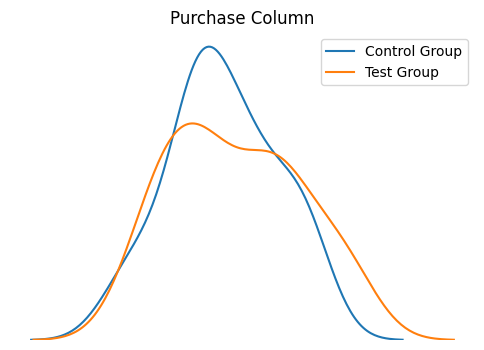

In [83]:
plt.figure(figsize=(6,4))
sns.kdeplot(df["Purchase_control"])
sns.kdeplot(df["Purchase_test"])
plt.legend(labels = ["Control Group","Test Group"])
plt.title("Purchase Column")
plt.axis("off")
plt.show()

In [54]:
df["Purchase_control"].mean(),df["Purchase_test"].mean()

(550.8940587702316, 582.1060966484677)

> There appears to be a difference in the means of the control and test groups' purchases, but this difference may be coincidental. This observation is not a statistically significant results.

<br>

#### How can we find statistically significant results?

**Indepented Two Sample T-Test**

The independent two-sample t-test is a statistical test that compares the means of two independent groups to determine if there is a significant difference between them. "Independent" means that the samples are not related to or dependent on each other.

**Requirements**
- Independent samples: The two groups being compared should be independent of each other, meaning that the observations in one group should not be related to or dependent on the observations in the other group.

- Normality: The data in each group should be normally distributed. This can be checked by examining the distribution of the data or by conducting a normality test.

- Equal variances: The variances of the two groups should be approximately equal. This can be checked by conducting a test for equal variances, such as Levene's test.

The Shapiro-Wilks Test for Normality<hr>


## A/B Test

### Hypotheses

The null hypothesis (H0) and alternative hypothesis (H1) of the Independent Samples t Test can be expressed in two different but equivalent ways:

- H0:  𝜇1 = 𝜇2 (There is no statistically significant difference between the purchasing amounts of the two groups)

- H1:  𝜇1 ≠ 𝜇2 (There is statistically significant difference between the purchasing amounts of the two groups)

<br>


#### The Shapiro-Wilks Test for Normality

The Shapiro-Wilks test is a statistical test used to determine whether a set of data is normally distributed. It is a common test used to check the normality assumption for many statistical tests, including the t-test and ANOVA.

- H0: There is no statistically significant difference between sample distribution and theoretical normal distribution

- H1: There is statistically significant difference between sample distribution and theoretical normal distribution

The test rejects the hypothesis of normality when the p-value is less than or equal to 0.05. Failing the normality test allows you to state with 95% confidence the data does not fit the normal distribution.

p-value < 0.05 (H0 rejected)

p-value > 0.05 (H0 not rejected)

In [60]:
controlGroup_test_stat, controlGroup_shapiro_pvalue = shapiro(df["Purchase_control"])
testGroup_test_stat, testGroup_shapiro_pvalue = shapiro(df["Purchase_test"])

In [64]:
print('Control Group Test statistic = %.4f, p-Value = %.4f \nTest Group Test statistic = %.4f, p-Value = %.4f' % (controlGroup_test_stat, controlGroup_shapiro_pvalue,testGroup_test_stat,testGroup_shapiro_pvalue))

Control Group Test statistic = 0.9773, p-Value = 0.5891 
Test Group Test statistic = 0.9589, p-Value = 0.1541


> H0 hypothesis could not be rejected. Statistically, it could not be rejected that the normal distribution assumption of the data set in which the Maximum Bidding (Control Group) was measured was met.

<br>


#### Levene’s Test for Homogeneity of variances

Levene's test works by comparing the absolute deviations of each observation from the group mean. The test statistic is calculated as the ratio of the mean square deviation between groups to the mean square deviation within groups. If the test statistic is greater than a critical value, the null hypothesis of equal variances is rejected, and it is concluded that the variances are not equal.



- H0 : Variances are homogeneous.

- H1 : Variances are not homogeneous.

p-value < 0.05 (H0 rejected)

p-value > 0.05 (H0 not rejected)

In [71]:
levene_test_statistic,levene_pvalue = levene(df["Purchase_control"],
                               df["Purchase_test"])

In [72]:
print('Levene Test statistic = %.4f, p-Value = %.4f' % (test_statistic, pvalue))

Levene Test statistic = 2.6393, p-Value = 0.1083


>  The variances were not statistically rejected as homogeneous.

> The assumptions of normality distribution and variance homogeneity were tested.Two assumptions are provided, we can now test for our main hypothesis.

#### Parametric Independent Two-Sample T Test (ttest_ind)

Since the normality of the distribution of the data set in which Average Bidding (Test Group) was measured was not rejected, the Parametric Independent Two-Sample T Test was applied for the Hypothesis Test.

Let's remember hypothesis

H0 : 𝜇1 = 𝜇2 (There is no statistically significant difference between the purchasing amounts of the two groups)

H1 : 𝜇1 ≠ 𝜇2 (There is statistically significant difference between sample distribution and theoretical normal distribution)

In [74]:
ttest_ind(df["Purchase_control"], df["Purchase_test"], equal_var=True)

Ttest_indResult(statistic=-0.9415584300312964, pvalue=0.34932579202108416)

> p-value greater then 0.05 so H0 is not rejected. There is no statistically significant difference between the Control group that was served “maximum bidding” campaign and Test group that was served “average bidding” campaign based on **Purchase**